In [61]:
import numpy as np
import pylab as plt
from IPython.display import display, Latex, clear_output, Markdown, Image, HTML
import ipywidgets as widgets
from astropy.table import Table, Column
from ipywidgets import interact, interactive, Button , Layout
import ipywidgets as w
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import math


# Create a text box for user to input text

get_user_text = w.Textarea( value='', placeholder='Enter your text here.', description='', disabled=False , layout=Layout(width='100%', height='250px') )

# Create a slider to obtain shift integer from user 

get_user_shift = w.IntSlider( value=7, min=1, max=26, step=1, description='Ceasar Shift:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')

# Function: After clicking on a button prompt, the next cell is executed.

def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    button_t = w.Button(button_style='info',description="Restart") 


from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Represent data, using sinusoidal functions, to solve problems

**By Jessica Cervi**

![Math_Gif](https://media.giphy.com/media/3ohzdVPNPuaD9BWcnu/giphy.gif)
<center>*GIF taken from https://media.giphy.com/media/3ohzdVPNPuaD9BWcnu, June 26th, 2018.*</center>



## Overview

>### Lesson outcomes

<ul>
    <li> Graph data and determine the sinusoidal functions, that best approximates the data. </li>
    <li> Interpret the graph of a sinusoidal function that models a situation, and explain the reasoning. </li>
</ul>


>## Introduction

In Mathematics, given a set of data points, it is possible to construct a curve, or mathematical function, that has the best fit to those series of data points. This process is called curve fitting.

In the case that the data are somewhat cyclic, it is possible tosketch a curve of best fit that somehow resembles a sinudoial function.  The fitting sinusoidal curve is found by determining the specific parameters which makes the curve match your data as closely as possible.

### Example

A clock with a pendulum sits above a counter. The height of the pendulum above the counter is measured 11 times t at  various time intervals from $t=0$ s to $t=5$ s. The results are reported in the following Table.


Time | Pendulum Height
--- | ---
 0| 65
0.2|66.5
0.4 | 68
0.8 |66.5
1.0 |  65
1.2 | 66.5
1.4  |68
1.6 | 66.5
1.8|65
2.0 | 66.5
2.2|68
2.4 | 66.5
2.6|65
2.8 | 66.5
3.0|68



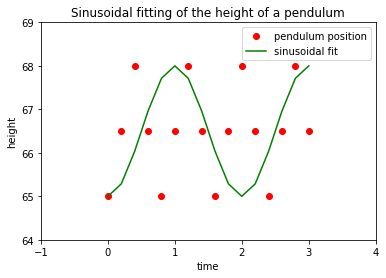

In [43]:
a = 0
b = 3.0
n = 16
#define time and height of the pendulum
time = np.linspace(a,b,n)
height = np.array([65, 66.5, 68, 66.5, 65, 66.5, 68, 66.5, 65, 66.5, 68, 66.5, 65, 66.5, 68, 66.5])

#sinusoidal fitting function
sin_fun = 1.5*np.sin(np.pi*time - (np.pi/2)) +66.5

#plot
plt.plot(time, height, "ro", time, sin_fun, "g") # Plot of the data and the fit

# Tile
plt.title("Sinusoidal fitting of the height of a pendulum")
#Axis and axis labels
plt.xlabel("time")
plt.ylabel("height")
axes = plt.gca()
axes.set_xlim([a-1,b+1])
axes.set_ylim([min(height)-1,1+max(height)])
#Legend
plt.legend(('pendulum position', 'sinusoidal fit'))

plt.show()

## The sinusoidal function

The key idea behind sinusoidal functions is that they can all be expressed as either a cosine or a sine function.

The general form of a sinusoidal function can be written as
$$ y = a \sin (bx-c)+d$$
or
$$y = a \cos (bx-c)+d$$


***

**Features of a sinuoidal function**
<ul>
    <li>$a$ is the amplitude 
        $$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$ 
   <li> $b$ is the number of cycles in $360^{\circ}$ or $2\pi$ (also called frequency). It can be used to compute the period  $T$ as $$T= \frac{360}{b} \quad\text{  or  } \quad T= \frac{2\pi}{b}$$ 
    <li> $d$ is the midline $$d = \frac{\text{maximum value} + \text{minimum value}}{2}$$
        <li> the value of $c$ indicated the horizontal translation that has been applied to the graph of $y=\sin(x)$ or $y=\cos(x)$   

<ul>


<ul>
 <li>In the graph of a sine function, $c$ is the distance from the vertical axis to the first midline point where the function is *increasing*.
<ul>

<img src="./sine_sinusoidal.jpg" style="width: 500px;"/>

<ul>
<li>In the graph of a cosine function, $c$ is the distance from the vertical axis to the *first maximum point*.
<ul>

<img src="./cos_sinusoidal.jpg" style="width: 500px;"/>

In this lesson we will only be looking at **sinusoidal functions**.

Use the section below to better your understanding the equation of a *sinusoidal* function

In [44]:
def lin_or_non(val):
    if val == "Yes":
        display(Latex("Correct!"))
        #display(Latex("This equation has no exponent on either variable, and is therefore linear."))
    elif val == "No":
        display(Latex("Try Again!"))

display(Latex("Is this the equation of a sinusoidal function?"))
display(Latex('$$y = 12\cos(\pi x +3.45) -3$$'))
    
interact(lin_or_non, val = widgets.Dropdown(options=[' ', 'Yes', 'No'],value = ' ',description = 'Choose One:',disabled = False));



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

interactive(children=(Dropdown(description='Choose One:', options=(' ', 'Yes', 'No'), value=' '), Output()), _dom_classes=('widget-interact',))

***

**Determine the characteristics parameters of a sinuoidal function**

In the next example, we will learn how to compute the characteristic parameters given the equation of a sinusoidal function

Determine the characteristics parameters from the following equation
$$y = 5\sin(3x) +2$$

<ul>
    <li> $a$ = 5 so the amplitude is 5
     <li>$b$ = 3 so the period $T$ is $\frac{2\pi}{3}$
     <li>$c$  = 0 so there is no horizontal translation
     <li>$d$ = 2 so the midline is at $y = 2$
<ul>


> ## Exercise: Finding the characteristic parameters of a sinusoidal function

Determine the characteristics parameters from the following equation

$$y = 14.1\sin(4.2x+3.4)+2$$


In [45]:
display(Latex("What is the amplitude of the given sinusoidal function?"))


#value = display(widgets.Text(value='',placeholder='Type something',description='Amplitude =:',disabled=False))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [46]:


# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '14.1'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The amplitude is \n $14.1$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The amplitude is \n $14.1$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))
        

# Please try again.

In [47]:
display(Latex("What is the value of the frequency in the given sinusoidal function?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)




<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [48]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '4.2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The frequency is \n $4.2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The frequency is \n $4.2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

In [49]:
display(Latex("By how much is the given sinusoidal function translated horizontally ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [50]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '3.4'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

In [51]:
display(Latex("What is the equation of the midline in the given sinusoidal function?"))



dattempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [52]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

## Example: Finding a Sinusoidal Functions from Temperature Data

Let's assume that we have some data representing the average temperate for each month:

Month | Average Temperature
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 22.2
5 | 27.2
6 | 32.9
7 | 36.5
8 | 38.4
9 | 32.9
10 | 24.4
11 | 19
12 | 11

The data is presented in the graph below

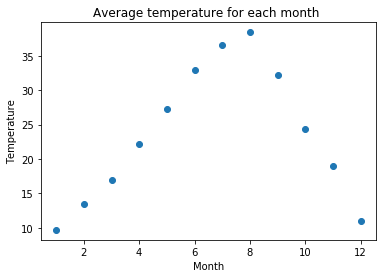

In [53]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
plt.plot(month, temperature, 'o')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
axes = plt.gca()
plt.show()

We want to fit this data to a sinusoidal function $ y = a \sin (bx-c)+d$.

First of all, we need to determine the *amplitude* $a$

$$a = \frac{\text{maximum value} - \text{minimum value}}{2} = \frac{38.4-9.7}{2} =14.35$$

Next, we determine the value of the midline $d$

$$d = \frac{\text{maximum value} + \text{minimum value}}{2} = \frac{38.4+9.7}{2} =24.05$$

For this exercise, the frequency $b$ be computed in the following way. The  average temperature cycle will  repeat itself every year, so period $T = 12$ months. Therefore $b$ can be computed by inverting the formula for the period $T$:

$$b = \frac{2\pi}{T} = \frac{2\pi}{12} =0.52$$

Using $a=14.35$, $b = 0.52$, and $d = 24.05$, determine horizontal shift by choosing an arbitrary data point (x,y) from the given table and solving the equation 

$$y = 14.35 \sin (0.52x-c)+24.05$$
for $c$.

Let’s choose the first data point, x = 1 (January), y = 9.7

$$9.7 = 14.35 \sin (0.52(1)-c)+24.05$$

$$-14.35.7 = 14.35 \sin (0.52-c)$$

$$-1 =  \sin (0.52-c)$$


When does $\sin = -1$? For consistency, we will choose an angle between $-pi/2$ and $pi/2$. 

$$\sin\left(-\frac{\pi}{2}\right)=-1$$
$${0.52 -c}=-\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c = \frac{\pi}{2} + 0.52 = 2.09$$

So the sinusoidal function that fits the data is

$$y = 14.35 \sin (0.52x-2.09)+24.05$$

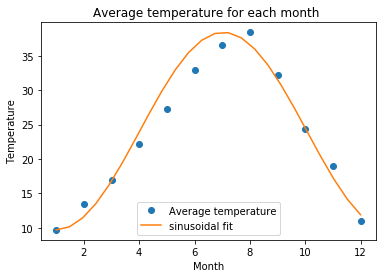

In [54]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
x = np.linspace(1,12, 24)
y = 14.35*np.sin(0.52*x -2.09) + 24.05
plt.plot(month, temperature, 'o', x, y)
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(('Average temperature', 'sinusoidal fit'))
axes = plt.gca()
plt.show()

### Exercises

TBD

### Conclusions

<ul>
    <li> Cyclic data can be fit by a sinusoidal curve
     <li> A sunosoidal curve is uniquely defined by characteristic paramenters
     <li>The parameters are the amplitude, the frequency, the horizontal translation and the midline
<ul>